In [1]:
import numpy as np
from matplotlib import pyplot as plt

def read_file(name):
    a = open(name,'r')
    for i in range(21):
        line = a.readline()
    
    res = []
    res_epoch = []
    cnt = 0
    while line: 
        if len(line) == 0:
#             print(1)
            return res
        elif len(line.split('\n')[0].split('\t')) > 1 and 'test' not in line.split('\n')[0].split('\t')[0]:
            line = a.readline()
        else:
            res_epoch = []
            cnt += 1
            while True:
                eps = line.split('\n')[0].split(',')[1]
                line = a.readline()
                tmp = [float(eps)]
                length = []
                for i in range(5):
                    tmp.append(float(line.split('\n')[0].split('\t')[6]))
                    try:
                        length.append(float(line.split('\n')[0].split('\t')[7]))
                    except:
                        pass
                    line = a.readline()
                res_epoch.append(tmp+length)
                if len(line.split('\n')[0].split(',')) <= 1:
                    if len(line) == 0:
#                         print(2)
                        res.append(np.array(res_epoch))
                        return res
                    else:
                        prop = float(line.split('\n')[0].split(' ')[3])
#                         print('----------')
#                         print()
                        line = a.readline()
#                         print(line)
                        line = a.readline() 
#                         print(line)
                        line = a.readline() 
#                         print(line)
                    break
        if len(res_epoch) > 0:
            res.append(np.array(res_epoch))
    return res, prop


In [10]:
percent = 0.1

def search(x,eps,percentile):
    tmp = 1-percentile
    tmp_eps = -1
    for i in range(len(eps)):
        if abs(x[i]-percentile)<tmp:
            tmp = abs(x[i]-percentile)
            tmp_eps = i
    return(tmp_eps)


def fun(H_all,D_all,codim_all,n_all,method_all,seed_all, print_=False,norm='2'):
    epochs = 1
    record = np.ones((len(H_all),len(D_all),len(codim_all),len(n_all),len(method_all),len(seed_all),epochs,6))*(-1000)
    
    prop = np.ones((len(H_all),len(D_all),len(codim_all),len(n_all),len(method_all),len(seed_all),epochs))*(-1000)
    
    res = []
    for H in H_all:
        tmp_H = []
        for D in D_all:
            tmp_D = []
            for codim in codim_all:
                tmp_codim = []
                for n in n_all:
                    tmp_n = []
                    for method in method_all:
                        tmp_method = []
                        for seed in seed_all:
                            if print_:
                                print(f'res/change_shift{D}_{codim}_{H}_{method}_{n}_{seed}_l{norm}.txt')
#                             try:
                            tmp, tmp_prop = read_file(f'res/change_shift{D}_{codim}_{H}_{method}_{n}_{seed}_l{norm}.txt')
    #                                 print(tmp)
#                                 prop[H,D,codim,n,method,seed,0] = tmp_prop
#                             except:
#                                 tmp = []
                            tmp_method.append(tmp)
                        tmp_n.append(tmp_method)
                    tmp_codim.append(tmp_n)
                tmp_D.append(tmp_codim)
            tmp_H.append(tmp_D)
        res.append(tmp_H)



    for H in range(len(H_all)):
        for D in range(len(D_all)):
            for codim in range(len(codim_all)):
                for n in range(len(n_all)):
                    for method in range(len(method_all)):
                        for seed in range(len(seed_all)):
                            for epoch in range(epochs):
#                                 try:
#                                 print(res[H][D][codim][n][method][seed][epoch])

                                try:
                                    _, tmp_prop = read_file(f'res/change_shift{D_all[D]}_{codim_all[codim]}_{H_all[H]}_{method_all[method]}_{n_all[n]}_{seed_all[seed]}_l{norm}.txt')
                                    prop[H,D,codim,n,method,seed,0] = tmp_prop
                                except:
                                    pass
#                                 print(res[H][D][codim][n][method][seed][epoch][0,:])
                                tmp_acc = res[H][D][codim][n][method][seed][epoch][:,2]
                                tmp_acc1 = res[H][D][codim][n][method][seed][epoch][:,4]
                                tmp_acc2 = res[H][D][codim][n][method][seed][epoch][:,5]
                                tmp_eps = res[H][D][codim][n][method][seed][epoch][:,0]
                                tmp_length = []
                                try:
                                    tmp_length = res[H][D][codim][n][method][seed][epoch][:,7]
                                    tmp_length1 = res[H][D][codim][n][method][seed][epoch][:,9]
                                    tmp_length2 = res[H][D][codim][n][method][seed][epoch][:,10]
                                except:
                                    pass
                                idx = search(tmp_acc, tmp_eps,percent)
                                idx1 = search(tmp_acc1, tmp_eps,percent)
                                idx2 = search(tmp_acc2, tmp_eps,percent)
                                if idx >= 0:
                                    record[H,D,codim,n,method,seed,epoch,0] = tmp_eps[idx]
                                    if len(tmp_length) >0:
                                        record[H,D,codim,n,method,seed,epoch,3] = tmp_length[idx]
                                if idx1 >= 0:
                                    record[H,D,codim,n,method,seed,epoch,1] = tmp_eps[idx1]
                                    if len(tmp_length) >0:
                                        record[H,D,codim,n,method,seed,epoch,4] = tmp_length1[idx1]
                                if idx2 >= 0:
                                    record[H,D,codim,n,method,seed,epoch,2] = tmp_eps[idx2]
                                    if len(tmp_length) >0:
                                        record[H,D,codim,n,method,seed,epoch,5] = tmp_length2[idx2]
                                
    #                                 print(H,D,codim,n,method,seed,epoch,idx,tmp_eps[idx])
#                                 except:
#                                     idx = -1

    return record, prop

In [72]:
D=1500
codim=100
H=2000
method='codim'
n=1000
for seed in range(1,11):
    tmp, prop = read_file(f'res/change_shift{D}_{codim}_{H}_{method}_{n}_{seed}_l2.txt')

    idx = search(tmp[0][:,5], tmp[0][:,0],percent)
    print(seed,tmp[0][idx,0])
# print(tmp)
print(record[0,4,0,0,0,:,:])

1 7.2
2 7.6
3 7.2
4 7.0
5 7.2
6 7.2
7 7.2
8 7.0
9 7.0
10 7.0
[[[-1000. -1000. -1000.]]

 [[-1000. -1000. -1000.]]

 [[-1000. -1000. -1000.]]

 [[-1000. -1000. -1000.]]

 [[-1000. -1000. -1000.]]

 [[-1000. -1000. -1000.]]

 [[-1000. -1000. -1000.]]

 [[-1000. -1000. -1000.]]

 [[-1000. -1000. -1000.]]

 [[-1000. -1000. -1000.]]]


In [65]:


H_all=[2000]
D_all=[100, 1000, 2000, 5000]
codim_all=[10,20,50]
n_all=[40,100,1000]
method_all=['codim','D','const']
seed_all=[1,2,3]

record = fun(H_all,D_all,codim_all,n_all,method_all,seed_all)

FileNotFoundError: [Errno 2] No such file or directory: 'res/change_shift100_10_2000_codim_40_1_l2.txt'

In [66]:

plt.plot(record[0,0,:,0,2,49,2])
plt.plot(record[0,0,0,:,2,49,2])
plt.plot(record[0,0,1,:,2,49,2])
plt.plot(record[0,0,2,:,2,49,2])

plt.legend([1,2,3,4])
plt.grid()
plt.ylim(0,10)


IndexError: index 49 is out of bounds for axis 5 with size 10

In [11]:

H_all=[2000]
D_all=[500, 1000,1500,2000,3000,4000,5000]
codim_all=[100]
n_all=[1000]
method_all=['const','codim']
seed_all=[1,2,3,4,5,6,7,8,9,10]

attack = '2'

record, prop =fun(H_all,D_all,codim_all,n_all,method_all,seed_all, True,attack)
# print(record)

res/change_shift500_100_2000_const_1000_1_l2.txt
res/change_shift500_100_2000_const_1000_2_l2.txt
res/change_shift500_100_2000_const_1000_3_l2.txt
res/change_shift500_100_2000_const_1000_4_l2.txt
res/change_shift500_100_2000_const_1000_5_l2.txt
res/change_shift500_100_2000_const_1000_6_l2.txt
res/change_shift500_100_2000_const_1000_7_l2.txt
res/change_shift500_100_2000_const_1000_8_l2.txt
res/change_shift500_100_2000_const_1000_9_l2.txt
res/change_shift500_100_2000_const_1000_10_l2.txt
res/change_shift500_100_2000_codim_1000_1_l2.txt
res/change_shift500_100_2000_codim_1000_2_l2.txt
res/change_shift500_100_2000_codim_1000_3_l2.txt
res/change_shift500_100_2000_codim_1000_4_l2.txt
res/change_shift500_100_2000_codim_1000_5_l2.txt
res/change_shift500_100_2000_codim_1000_6_l2.txt
res/change_shift500_100_2000_codim_1000_7_l2.txt
res/change_shift500_100_2000_codim_1000_8_l2.txt
res/change_shift500_100_2000_codim_1000_9_l2.txt
res/change_shift500_100_2000_codim_1000_10_l2.txt
res/change_shift10

(1, 7, 1, 1, 2, 1, 6)
[500, 1000, 1500, 2000, 3000, 4000, 5000]


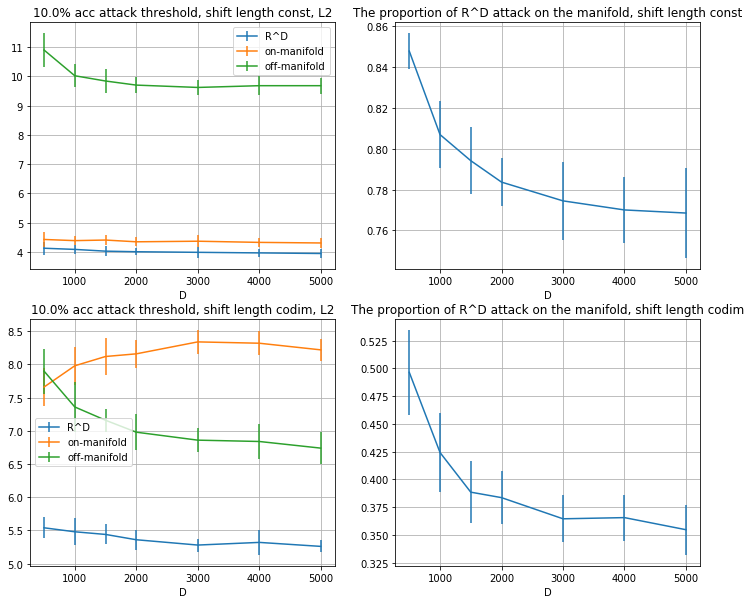

In [12]:

record = np.array(record)
print(record.mean(5).shape)
# print(record[0,0,0,0,0,:,0,1])
# print(record[0,:,0,0,1,0,0,2])
# print(record[0,:,0,0,2,0,0,2])
# print(record)
print(D_all)
# print(record.mean(5)[0,:,0,0,i,0,1])


fig, axs = plt.subplots(2, 2,figsize=(12,10))

for i in range(2):
    ax = axs[i][0]

    # plt.plot(np.array(D_all),record.mean(5)[0,:,0,0,0,0,2])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,0],record.std(5)[0,:,0,0,i,0,0])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,1],record.std(5)[0,:,0,0,i,0,1])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,2],record.std(5)[0,:,0,0,i,0,2])
    ax.set_xlabel('D')
    ax.set_title(f'{percent*100}% acc attack threshold, shift length {method_all[i]}, L{attack}')
    ax.legend(['R^D','on-manifold','off-manifold'])
    ax.grid()

#     ax.set_ylim(0,200)
    ax = axs[i][1]
    
    ax.set_xlabel('D')
    ax.errorbar(np.array(D_all),prop.mean(5)[0,:,0,0,i,0],prop.std(5)[0,:,0,0,i,0])
    ax.set_title(f'The proportion of R^D attack on the manifold, shift length {method_all[i]}')
#     ax.legend(['R^D','on-manifold','off-manifold'])
    ax.grid()    
    

In [13]:

H_all=[2000]
D_all=[500, 1000,1500,2000,3000,4000,5000]
codim_all=[100]
n_all=[1000]
method_all=['const','codim']
seed_all=[1,2,3,4,5,6,7,8,9,10]

attack = 'inf'

record, prop =fun(H_all,D_all,codim_all,n_all,method_all,seed_all, True,attack)
# print(record)

res/change_shift500_100_2000_const_1000_1_linf.txt
res/change_shift500_100_2000_const_1000_2_linf.txt
res/change_shift500_100_2000_const_1000_3_linf.txt
res/change_shift500_100_2000_const_1000_4_linf.txt
res/change_shift500_100_2000_const_1000_5_linf.txt
res/change_shift500_100_2000_const_1000_6_linf.txt
res/change_shift500_100_2000_const_1000_7_linf.txt
res/change_shift500_100_2000_const_1000_8_linf.txt
res/change_shift500_100_2000_const_1000_9_linf.txt
res/change_shift500_100_2000_const_1000_10_linf.txt
res/change_shift500_100_2000_codim_1000_1_linf.txt
res/change_shift500_100_2000_codim_1000_2_linf.txt
res/change_shift500_100_2000_codim_1000_3_linf.txt
res/change_shift500_100_2000_codim_1000_4_linf.txt
res/change_shift500_100_2000_codim_1000_5_linf.txt
res/change_shift500_100_2000_codim_1000_6_linf.txt
res/change_shift500_100_2000_codim_1000_7_linf.txt
res/change_shift500_100_2000_codim_1000_8_linf.txt
res/change_shift500_100_2000_codim_1000_9_linf.txt
res/change_shift500_100_2000_c

(1, 7, 1, 1, 2, 1, 6)
[500, 1000, 1500, 2000, 3000, 4000, 5000]


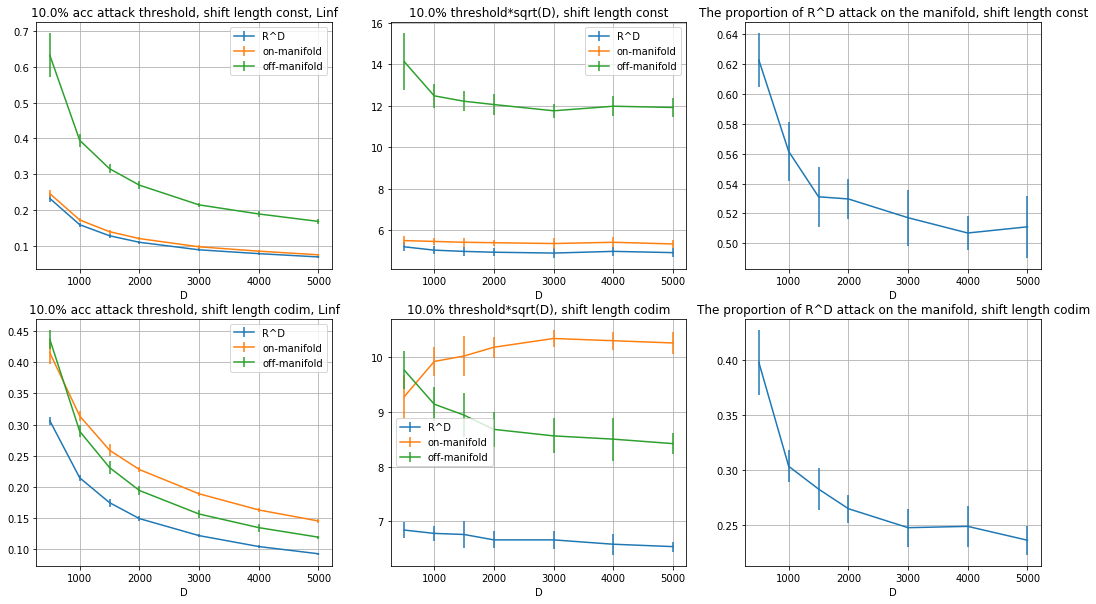

In [63]:

record = np.array(record)
print(record.mean(5).shape)
# print(record[0,0,0,0,0,:,0,1])
# print(record[0,:,0,0,1,0,0,2])
# print(record[0,:,0,0,2,0,0,2])
# # print(record)
print(D_all)
# print(record.mean(5)[0,:,0,0,i,0,1])


fig, axs = plt.subplots(2, 3,figsize=(18,10))

for i in range(2):
    ax = axs[i][0]

    # plt.plot(np.array(D_all),record.mean(5)[0,:,0,0,0,0,2])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,0],record.std(5)[0,:,0,0,i,0,0])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,1],record.std(5)[0,:,0,0,i,0,1])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,2],record.std(5)[0,:,0,0,i,0,2])
    ax.set_xlabel('D')
    ax.set_title(f'{percent*100}% acc attack threshold, shift length {method_all[i]}, L{attack}')
    ax.legend(['R^D','on-manifold','off-manifold'])
    ax.grid()
    
    ax = axs[i][1]

    # plt.plot(np.array(D_all),record.mean(5)[0,:,0,0,0,0,2])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,0]*np.sqrt(np.array(D_all)),record.std(5)[0,:,0,0,i,0,0]*np.sqrt(np.array(D_all)))
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,1]*np.sqrt(np.array(D_all)),record.std(5)[0,:,0,0,i,0,1]*np.sqrt(np.array(D_all)))
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,2]*np.sqrt(np.array(D_all)),record.std(5)[0,:,0,0,i,0,2]*np.sqrt(np.array(D_all)))
    ax.set_xlabel('D')
    ax.set_title(f'{percent*100}% threshold*sqrt(D), shift length {method_all[i]}')
    ax.legend(['R^D','on-manifold','off-manifold'])
    ax.grid()
#     ax.set_ylim(0,200)
    ax = axs[i][2]
    
    ax.set_xlabel('D')
    ax.errorbar(np.array(D_all),prop.mean(5)[0,:,0,0,i,0]/(np.array(D_all)),prop.std(5)[0,:,0,0,i,0]/(np.array(D_all)))
    ax.set_title(f'The proportion of R^D attack on the manifold, shift length {method_all[i]}')
#     ax.legend(['R^D','on-manifold','off-manifold'])
    ax.grid()    
    

In [6]:

H_all=[2000]
D_all=[500, 1000,1500,2000,3000,4000,5000]
codim_all=[100]
n_all=[1000]
method_all=['codim','const']
seed_all=[1,2,3,4,5,6,7,8,9,10]

attack = '2_projection'

record, prop =fun(H_all,D_all,codim_all,n_all,method_all,seed_all, False,attack)
# print(record)

(1, 7, 1, 1, 2, 1, 6)
[6.  6.4 6.2 6.8 6.2 6.8 5.8 6.8 6.2 6.4]
[-1000. -1000. -1000. -1000. -1000. -1000. -1000.]
[500, 1000, 1500, 2000, 3000, 4000, 5000]


/apps/spack/brown/apps/anaconda/2020.02-py37-gcc-4.8.5-mmvdvsv/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log
/apps/spack/brown/apps/anaconda/2020.02-py37-gcc-4.8.5-mmvdvsv/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in log
/apps/spack/brown/apps/anaconda/2020.02-py37-gcc-4.8.5-mmvdvsv/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in log


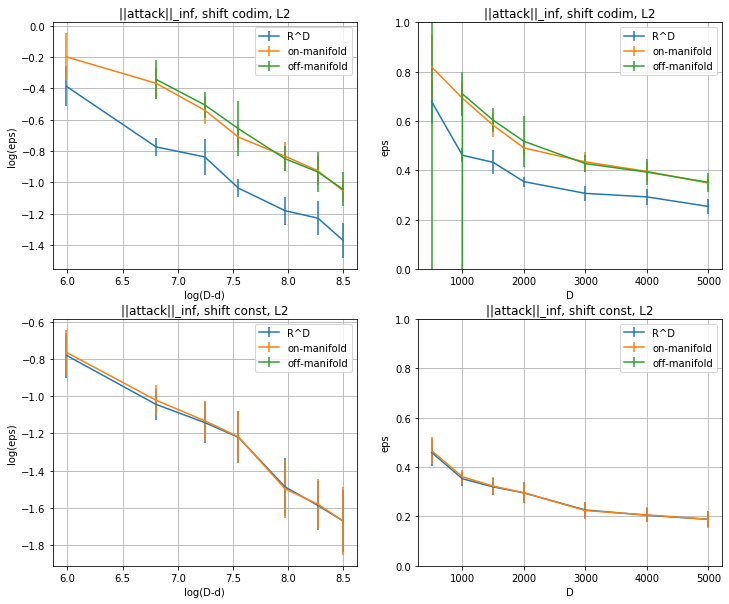

In [7]:
from sklearn.linear_model import LinearRegression

record = np.array(record)
print(record.mean(5).shape)
print(record[0,0,0,0,0,:,0,1])
print(record[0,:,0,0,1,0,0,2])
# print(record[0,:,0,0,2,0,0,2])
# print(record)
print(D_all)
# print(record.mean(5)[0,:,0,0,i,0,1])
d=100

fig, axs = plt.subplots(len(method_all), 2,figsize=(12,10))

for i in range(len(method_all)):
#     ax = axs[i][0]

#     # plt.plot(np.array(D_all),record.mean(5)[0,:,0,0,0,0,2])
#     ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,0],record.std(5)[0,:,0,0,i,0,0])
#     ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,1],record.std(5)[0,:,0,0,i,0,1])
#     ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,2],record.std(5)[0,:,0,0,i,0,2])
#     ax.set_xlabel('D')
#     ax.set_title(f'{percent*100}% acc attack threshold, shift {method_all[i]}, L2')
#     ax.legend(['R^D','on-manifold','off-manifold'])
#     ax.set_ylabel('eps')
#     ax.grid()

    ax = axs[i][1]
    ax.set_ylim(0,1)

    # plt.plot(np.array(D_all),record.mean(5)[0,:,0,0,0,0,2])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,3],record.std(5)[0,:,0,0,i,0,3])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,4],record.std(5)[0,:,0,0,i,0,4])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,5],record.std(5)[0,:,0,0,i,0,5])
#     ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,1],record.std(5)[0,:,0,0,i,0,1])
#     ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,2],record.std(5)[0,:,0,0,i,0,2])
    ax.set_xlabel('D')
    ax.set_title(f'||attack||_inf, shift {method_all[i]}, L2')
    ax.legend(['R^D','on-manifold','off-manifold'])
    ax.set_ylabel('eps')
    ax.grid()

    ax = axs[i][0]

    # plt.plot(np.array(D_all),record.mean(5)[0,:,0,0,0,0,2])
    ax.errorbar(np.log(np.array(D_all)-d),np.log(record.mean(5)[0,:,0,0,i,0,3]),np.log(record).std(5)[0,:,0,0,i,0,3])
    ax.errorbar(np.log(np.array(D_all)-d),np.log(record.mean(5)[0,:,0,0,i,0,4]),np.log(record).std(5)[0,:,0,0,i,0,4])
    ax.errorbar(np.log(np.array(D_all)-d),np.log(record.mean(5)[0,:,0,0,i,0,5]),np.log(record).std(5)[0,:,0,0,i,0,5])
#     ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,1],record.std(5)[0,:,0,0,i,0,1])
#     ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,2],record.std(5)[0,:,0,0,i,0,2])
    ax.set_xlabel('log(D-d)')
    ax.set_ylabel('log(eps)')
    ax.set_title(f'||attack||_inf, shift {method_all[i]}, L2')
    ax.legend(['R^D','on-manifold','off-manifold'])
    ax.grid()
    
#     reg = LinearRegression().fit(np.log(np.array([D_all])-d).transpose(), np.log(record.mean(5)[0,:,0,0,i,0,3]))
#     print(reg.coef_)
    
#     ax = axs[i][3]
    
#     ax.set_xlabel('D')
#     ax.errorbar(np.array(D_all),prop.mean(5)[0,:,0,0,i,0],prop.std(5)[0,:,0,0,i,0])
#     ax.set_title(f'The proportion of R^D attack on the manifold, shift length {method_all[i]}')
# #     ax.legend(['R^D','on-manifold','off-manifold'])
#     ax.grid()    
    

(1, 7, 1, 1, 2, 1, 6)
[500, 1000, 1500, 2000, 3000, 4000, 5000]


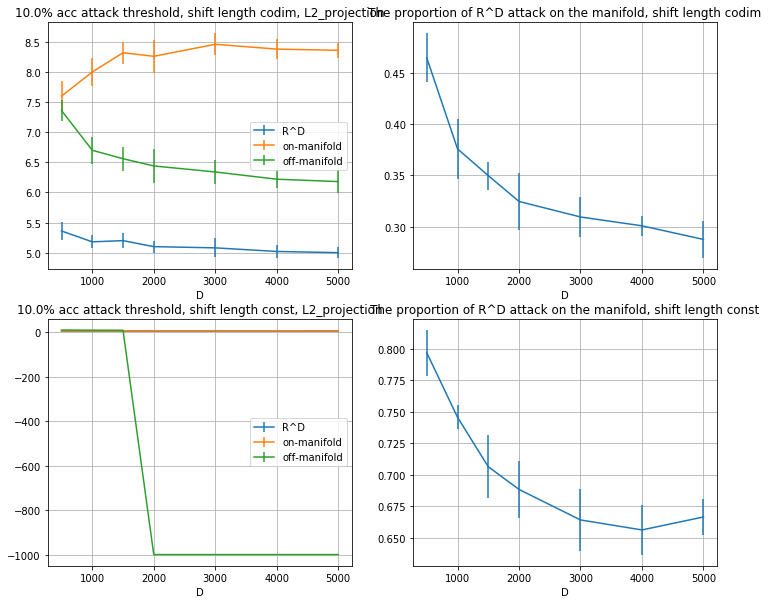

In [15]:

record = np.array(record)
print(record.mean(5).shape)
# print(record[0,0,0,0,0,:,0,1])
# print(record[0,:,0,0,1,0,0,2])
# print(record[0,:,0,0,2,0,0,2])
# print(record)
print(D_all)
# print(record.mean(5)[0,:,0,0,i,0,1])


fig, axs = plt.subplots(2, 2,figsize=(12,10))

for i in range(2):
    ax = axs[i][0]

    # plt.plot(np.array(D_all),record.mean(5)[0,:,0,0,0,0,2])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,0],record.std(5)[0,:,0,0,i,0,0])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,1],record.std(5)[0,:,0,0,i,0,1])
    ax.errorbar(np.array(D_all),record.mean(5)[0,:,0,0,i,0,2],record.std(5)[0,:,0,0,i,0,2])
    ax.set_xlabel('D')
    ax.set_title(f'{percent*100}% acc attack threshold, shift length {method_all[i]}, L{attack}')
    ax.legend(['R^D','on-manifold','off-manifold'])
    ax.grid()

#     ax.set_ylim(0,200)
    ax = axs[i][1]
    
    ax.set_xlabel('D')
    ax.errorbar(np.array(D_all),prop.mean(5)[0,:,0,0,i,0],prop.std(5)[0,:,0,0,i,0])
    ax.set_title(f'The proportion of R^D attack on the manifold, shift length {method_all[i]}')
#     ax.legend(['R^D','on-manifold','off-manifold'])
    ax.grid()    
    

In [67]:

H_all=[2000]
D_all=[2000]
codim_all=[20,  50,80, 100,150, 200,250]
n_all=[1000]
method_all=['const','codim']
seed_all=[1,2,3,4,5,6,7,8,9,10]
record, prop=fun(H_all,D_all,codim_all,n_all,method_all,seed_all,False)

[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1.  1.  1.  1. ]
[0.2 1.  1. 

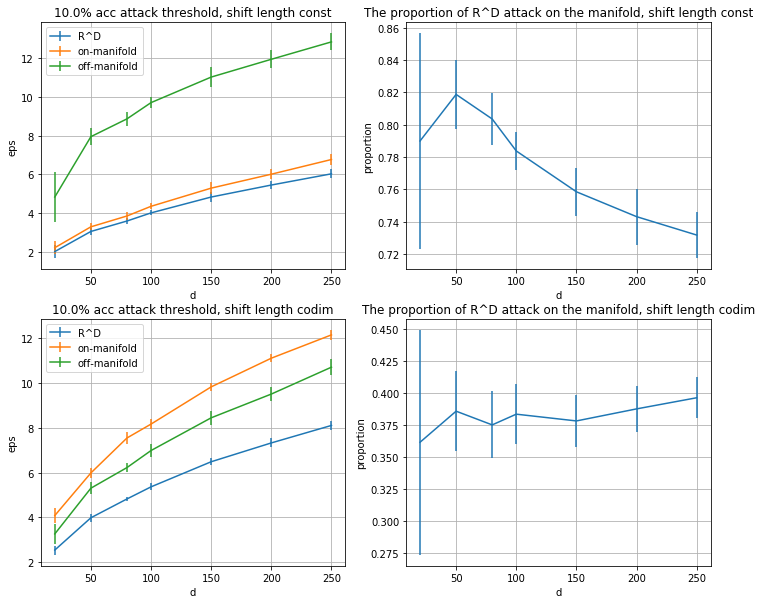

In [69]:

record = np.array(record)
fig, axs = plt.subplots(2, 2,figsize=(12,10))

for i in range(2):
    ax = axs[i][0]

    # plt.plot(np.array(D_all),record.mean(5)[0,:,0,0,0,0,2])
    ax.errorbar(np.array(codim_all),record.mean(5)[0,0,:,0,i,0,0],record.std(5)[0,0,:,0,i,0,0])
    ax.errorbar(np.array(codim_all),record.mean(5)[0,0,:,0,i,0,1],record.std(5)[0,0,:,0,i,0,1])
    ax.errorbar(np.array(codim_all),record.mean(5)[0,0,:,0,i,0,2],record.std(5)[0,0,:,0,i,0,2])
    ax.set_title(f'{percent*100}% acc attack threshold, shift length {method_all[i]}')
    ax.legend(['R^D','on-manifold','off-manifold'])
    ax.grid()
    ax.set_ylabel('eps')
    ax.set_xlabel('d')
    
#     ax = axs[i][1]

#     # plt.plot(np.array(D_all),record.mean(5)[0,:,0,0,0,0,2])
#     ax.errorbar(np.array(codim_all),record.mean(5)[0,0,:,0,i,0,0]/record.mean(5)[0,0,:,0,i,0,1],record.std(5)[0,0,:,0,i,0,0])
#     ax.errorbar(np.array(codim_all),record.mean(5)[0,0,:,0,i,0,1]/record.mean(5)[0,0,:,0,i,0,1],record.std(5)[0,0,:,0,i,0,1])
#     ax.errorbar(np.array(codim_all),record.mean(5)[0,0,:,0,i,0,2]/record.mean(5)[0,0,:,0,i,0,1],record.std(5)[0,0,:,0,i,0,2])
#     ax.set_title(f'{percent*100}% acc attack threshold, shift length {method_all[i]}')
#     ax.legend(['R^D','on-manifold','off-manifold'])
#     ax.grid()
#     ax.set_ylabel('ratio')
#     ax.set_xlabel('d')
#     ax.set_ylim(1,100)
    ax = axs[i][1]
    
    ax.set_xlabel('d')
    ax.set_ylabel('proportion')
    ax.errorbar(np.array(codim_all),prop.mean(5)[0,0,:,0,i,0],prop.std(5)[0,0,:,0,i,0])
    ax.set_title(f'The proportion of R^D attack on the manifold, shift length {method_all[i]}')
    ax.grid()    
    

In [3]:

H_all=[2000]
D_all=[2000]
codim_all=[20,  50,80, 100,150, 200,250]
n_all=[1000]
method_all=['codim','low']
seed_all=[1,2,3,4,5,6,7,8,9,10]
record, prop=fun(H_all,D_all,codim_all,n_all,method_all,seed_all,False)

FileNotFoundError: [Errno 2] No such file or directory: 'res/change_shift2000_20_2000_low_1000_1_l2.txt'

In [ ]:

record = np.array(record)
fig, axs = plt.subplots(3, 3,figsize=(18,15))

for i in range(3):
    ax = axs[i][0]

    # plt.plot(np.array(D_all),record.mean(5)[0,:,0,0,0,0,2])
    ax.errorbar(np.array(codim_all),record.mean(5)[0,0,:,0,i,0,0],record.std(5)[0,0,:,0,i,0,0])
    ax.errorbar(np.array(codim_all),record.mean(5)[0,0,:,0,i,0,1],record.std(5)[0,0,:,0,i,0,1])
    ax.errorbar(np.array(codim_all),record.mean(5)[0,0,:,0,i,0,2],record.std(5)[0,0,:,0,i,0,2])
    ax.set_title(f'{percent*100}% acc attack threshold, shift length {method_all[i]}')
    ax.legend(['R^D','on-manifold','off-manifold'])
    ax.grid()
    ax.set_ylabel('eps')
    ax.set_xlabel('d')
    
    ax = axs[i][1]

    # plt.plot(np.array(D_all),record.mean(5)[0,:,0,0,0,0,2])
    ax.errorbar(np.array(codim_all),record.mean(5)[0,0,:,0,i,0,0]/record.mean(5)[0,0,:,0,i,0,1],record.std(5)[0,0,:,0,i,0,0])
    ax.errorbar(np.array(codim_all),record.mean(5)[0,0,:,0,i,0,1]/record.mean(5)[0,0,:,0,i,0,1],record.std(5)[0,0,:,0,i,0,1])
    ax.errorbar(np.array(codim_all),record.mean(5)[0,0,:,0,i,0,2]/record.mean(5)[0,0,:,0,i,0,1],record.std(5)[0,0,:,0,i,0,2])
    ax.set_title(f'{percent*100}% acc attack threshold, shift length {method_all[i]}')
    ax.legend(['R^D','on-manifold','off-manifold'])
    ax.grid()
    ax.set_ylabel('ratio')
    ax.set_xlabel('d')
#     ax.set_ylim(1,100)
    ax = axs[i][2]
    
    ax.set_xlabel('d')
    ax.set_ylabel('proportion')
    ax.errorbar(np.array(codim_all),prop.mean(5)[0,0,:,0,i,0],prop.std(5)[0,0,:,0,i,0])
    ax.set_title(f'The proportion of R^D attack on the manifold, shift length {method_all[i]}')
    ax.grid()    
    